In [123]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% end of housekeeping

# First derivative to determine endpoint (extremum)


Going up in pH the steep part (inflection point = equiv point) of the curve will be a maximum in the derivative. If going down in pH (titrate base with acid) it will be a minimum.

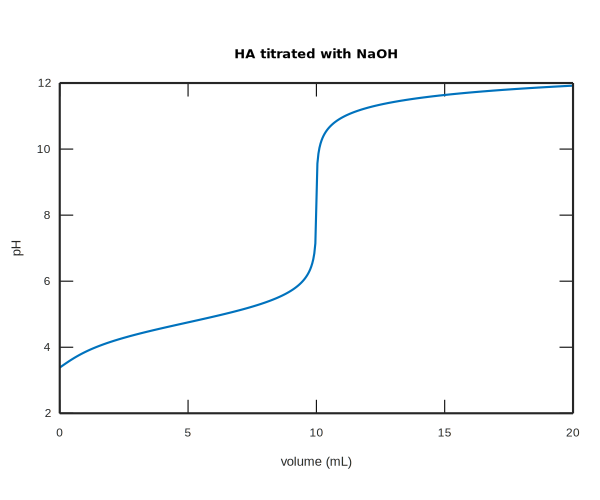

In [124]:
%plot -s 600,500 -f 'svg'
%input the parameters ...
AT=0.01; % conc of weak acid in mol/L
VT=0.1; % volume in L
pKa=4.75; % weak acid pKa value
titrantconc=0.1; % titrant conc in mol/L
%----------------------------------------------------
% fixed parameters
points=500; % number of points to plot between 0 and 2Ve
Kw=1e-14; Ka=10^-pKa; Ve=(AT*VT)/titrantconc; steps=(2*Ve)/points;
% now loop over titration points
vol=0:steps:2*Ve;
ATv=(AT*VT)./(vol+VT); NaT=(vol*titrantconc)./(vol+VT);

for i=1:length(vol)
    a=1;
    b=Ka+NaT(i);
    c=NaT(i)*Ka-Ka*ATv(i)-Kw;
    d=-Kw*Ka;
    t=roots([a b c d]); %finds the roots
    t=t(imag(t)==0); %sets any imaginary roots to zero
    % display the positive real root
    t=t(t>0); pH(i)=-log10(t);
end

vol=vol*1000;

plot(vol,pH,'linewidth',2); xlabel('volume (mL)'); ylabel('pH')
set(gca,'fontsize',11,'linewidth',2)
title('HA titrated with NaOH')
%axis([0 0.02 2 12])

% add strong strong for comparison
%pHs=2:0.1:12; Hs=10.^-pHs; OHs=Kw./Hs; Nas=OHs+AcT-Hs; 
%hold on; plot(Nas,pHs,'k--','linewidth',2)

endptvol = 9.9800


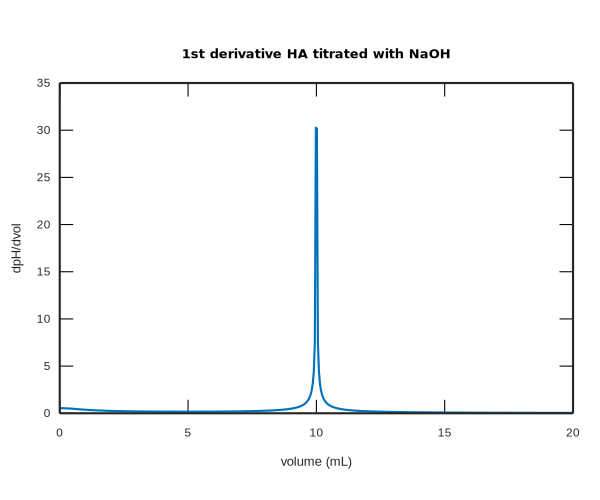

In [125]:
%plot -s 600,500 -f 'svg'
N=length(vol); dpH=diff(pH); dvol=diff(vol); plotvol=vol(1:N-1)+dvol/2; 
dpHbydvol=dpH./dvol;

plot(plotvol,dpHbydvol,'linewidth',2); xlabel('volume (mL)'); ylabel('dpH/dvol')
set(gca,'fontsize',11,'linewidth',2)
title('1st derivative HA titrated with NaOH')

[endptpH,index]=max(dpHbydvol); endptvol=plotvol(index)

# second derivative

zero at the maximum of the first derivative.

endptvol = 10.0000


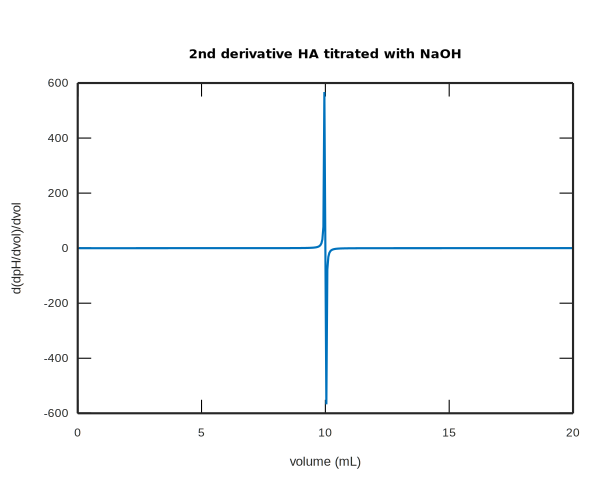

In [126]:
%plot -s 600,500 -f 'svg'
N=length(plotvol); ddpH=diff(dpHbydvol); ddvol=diff(plotvol); plotplotvol=plotvol(1:N-1)+ddvol/2; 
ddpHbydvol=ddpH./ddvol;

plot(plotplotvol,ddpHbydvol,'linewidth',2); xlabel('volume (mL)'); ylabel('d(dpH/dvol)/dvol')
set(gca,'fontsize',11,'linewidth',2)
title('2nd derivative HA titrated with NaOH')

[ddydxhigh,indexhigh]=max(ddpHbydvol);
[ddydxlow,indexlow]=min(ddpHbydvol);

x=[plotplotvol(indexhigh) plotplotvol(indexlow)];
y=[ddydxhigh ddydxlow];

param=polyfit(x,y,1);
endptvol=-1*(param(2)/param(1))

# Gran method

the gran method plots the amount of titrant added (mol) versus volume added.  once the reaction is done the titrant does not react and just increases linearly.  the volume intercept is the end point volume.

endptvol = 10.0000


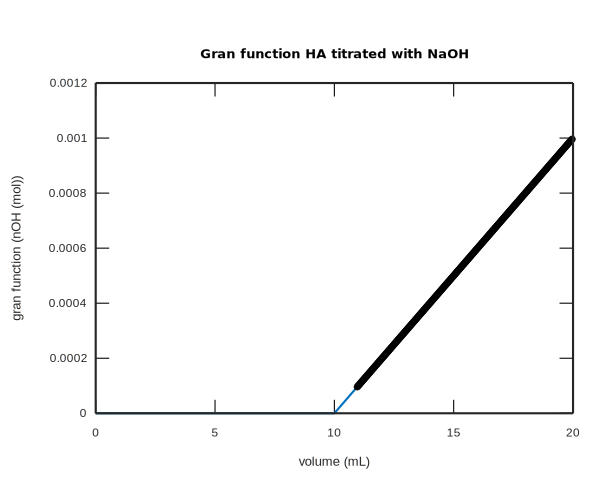

In [127]:
%plot -s 600,500 -f 'svg'
Kw=1e-14; H=10.^-pH; nOH=(vol/1000+VT).*(Kw./H);

plot(vol,nOH,'linewidth',2); 
xlabel('volume (mL)'); ylabel('gran function (nOH (mol))')
set(gca,'fontsize',11,'linewidth',2)
title('Gran function HA titrated with NaOH')

high=floor(points/2+0.5*points);
low=floor(points/2+0.05*points);

x=[vol(low:high)];
y=[nOH(low:high)];

hold on
plot(x,y,'k.'); 


param=polyfit(x,y,1);
endptvol=-1*(param(2)/param(1))